# Data Analysis and Visualization Assignment # 02
### Student Name : Ali Shoaib
### Student Roll No: NIM-BSCS-2021-33
### Intructor : Mohammad Bilal

#### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data file and use short names for Columns

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("1- mental-illnesses-prevalence.csv")

# Create a dictionary mapping original column names to short names
short_names = {
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
}

# Rename columns in the DataFrame using short names
df.rename(columns=short_names, inplace=True)
df

,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


#### Examine the data's metadata, including the number of rows and columns (size), data types (e.g., numerical, categorical), and feature ranges.

In [ ]:
# Displaying the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Displaying data types of each column
print("\nData types:")
print(df.dtypes)

# Displaying summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Displaying unique values and their counts for categorical columns
print("\nUnique values for categorical columns:")
for column in df.select_dtypes(include=['object']):
    print("\nColumn:", column)
    print(df[column].value_counts())

# Displaying feature ranges for numerical columns
print("\nFeature ranges for numerical columns:")
for column in df.select_dtypes(include=['int', 'float']):
    min_val = df[column].min()
    max_val = df[column].max()
    print("Column:", column)
    print("Range:", min_val, "-", max_val)


Number of rows: 6420
Number of columns: 8

Data types:
Entity            object
Code              object
Year               int64
Schizophrenia    float64
Depressive       float64
Anxiety          float64
Bipolar          float64
Eating           float64
dtype: object

Summary statistics for numerical columns:
              Year  Schizophrenia   Depressive      Anxiety      Bipolar  \
count  6420.000000    6420.000000  6420.000000  6420.000000  6420.000000   
mean   2004.500000       0.266604     3.767036     4.101840     0.636968   
std       8.656116       0.039383     0.925286     1.050543     0.233391   
min    1990.000000       0.188416     1.522333     1.879996     0.181667   
25%    1997.000000       0.242267     3.080036     3.425846     0.520872   
50%    2004.500000       0.273477     3.636772     3.939547     0.579331   
75%    2012.000000       0.286575     4.366252     4.564164     0.844406   
max    2019.000000       0.462045     7.645899     8.624634     1.506730   

   

#### Identify and address missing values in the dataset. You can choose to impute missing values, remove rows with missing data, or implement a strategy based on the specific data points.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Strategy: Imputation
# Let's impute missing values in numerical columns with mean and in categorical columns with mode
print(df)
for column in df.columns:
    if df[column].dtype == 'object':
        # For categorical columns, fill missing values with mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with mean
        df[column].fillna(df[column].mean(), inplace=True)

# Checking if missing values are handled
print("\nAfter handling missing values:")
print(df.isnull().sum())
print(df)

Missing values:
Entity             0
Code             270
Year               0
Schizophrenia      0
Depressive         0
Anxiety            0
Bipolar            0
Eating             0
dtype: int64
           Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0     Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1     Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2     Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3     Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4     Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   
...           ...  ...   ...            ...         ...       ...       ...   
6415     Zimbabwe  ZWE  2015       0.201042    3.407624  3.184012  0.538596   
6416     Zimbabwe  ZWE  2016       0.201319    3.410755  3.187148  0.538593   
6417     Zimbabwe  ZWE  2017       0.201639    3.411965  3.188418  0.538589   
6418     Zimb

#### Check for outliers in the data and identify and remove any irrelevant or duplicate data points.

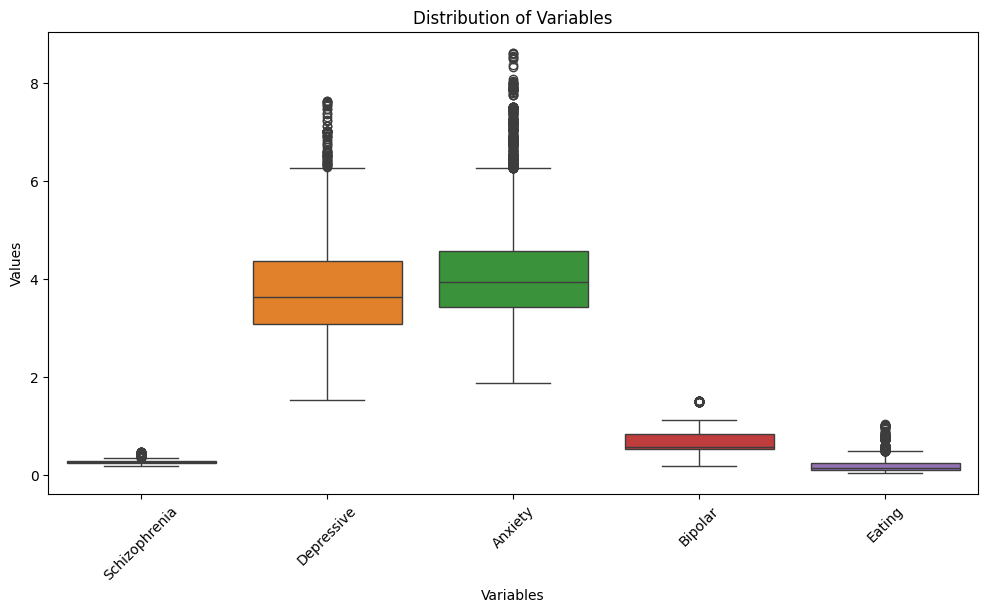

In [ ]:
# Visualize the distribution of each variable using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Entity', 'Code', 'Year'], axis=1))
plt.title('Distribution of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for each variable
z_scores = df.drop(['Entity', 'Code', 'Year'], axis=1).apply(zscore)

# Identify outliers using a threshold (e.g., z-score > 3 or z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Create a boolean mask indicating outliers
outlier_mask = outliers.any(axis=1)

# Filter the original DataFrame to show only rows identified as outliers
outliers_df = df[outlier_mask]
print("Outliers:")
print(outliers_df)


# Remove outliers
df_cleaned = df[~outliers.any(axis=1)]
print("After Removing the Outliers:")
df_cleaned

Outliers:
             Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
360       Australia  AUS  1990       0.389098    4.398445  5.746219  1.116065   
361       Australia  AUS  1991       0.388872    4.427192  5.655439  1.116137   
362       Australia  AUS  1992       0.388684    4.453339  5.569575  1.116212   
363       Australia  AUS  1993       0.388537    4.475146  5.492104  1.116280   
364       Australia  AUS  1994       0.388431    4.495964  5.426641  1.116344   
...             ...  ...   ...            ...         ...       ...       ...   
6085  United States  USA  2015       0.442377    4.382141  5.172533  0.601664   
6086  United States  USA  2016       0.436417    4.372808  5.168079  0.601451   
6087  United States  USA  2017       0.431800    4.369103  5.175325  0.601232   
6088  United States  USA  2018       0.431886    4.369584  5.342051  0.601198   
6089  United States  USA  2019       0.433649    4.375998  5.697748  0.601298   

        Eating  


,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


#### After cleaning, perform basic descriptive statistics on the clean data.

In [ ]:
# Perform basic descriptive statistics on the clean data
descriptive_stats = df_cleaned.describe()
print(descriptive_stats)

              Year  Schizophrenia   Depressive      Anxiety      Bipolar  \
count  6193.000000    6193.000000  6193.000000  6193.000000  6193.000000   
mean   2004.466494       0.264732     3.726287     4.025302     0.626213   
std       8.666641       0.035679     0.887797     0.954179     0.223958   
min    1990.000000       0.188416     1.522333     1.879996     0.181667   
25%    1997.000000       0.241331     3.065326     3.415639     0.516081   
50%    2004.000000       0.273258     3.603732     3.925906     0.574436   
75%    2012.000000       0.285830     4.344197     4.449831     0.829098   
max    2019.000000       0.384292     6.532928     7.229704     1.112766   

            Eating  
count  6193.000000  
mean      0.186129  
std       0.120518  
min       0.044780  
25%       0.095799  
50%       0.141366  
75%       0.237481  
max       0.590252  


#### Compare data sets before and after cleaning using data visualization techniques.

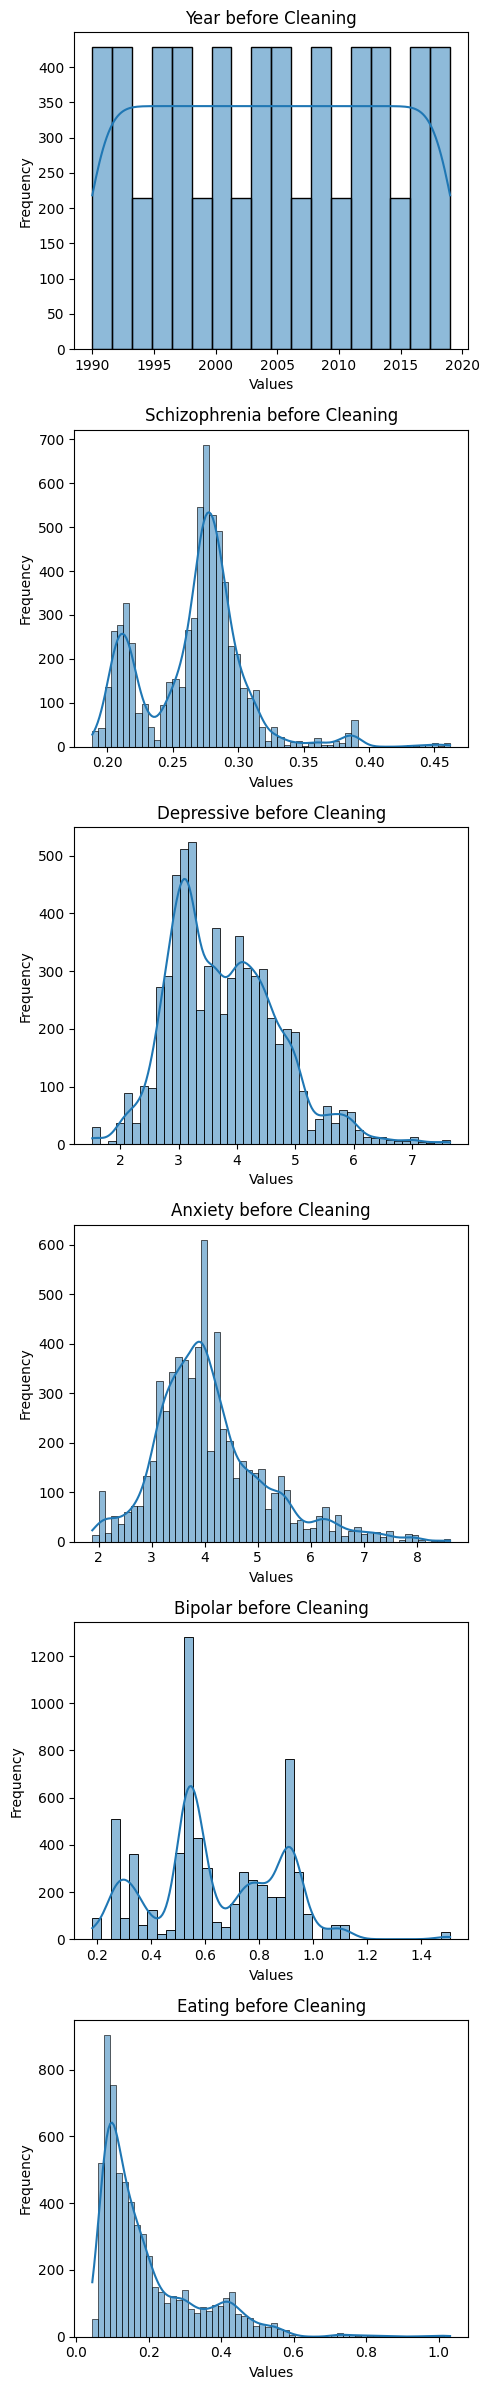

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Set up the figure and axes with a larger size
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(5, 4*len(numeric_columns)))

# Histograms before cleaning
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'{column} before Cleaning')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

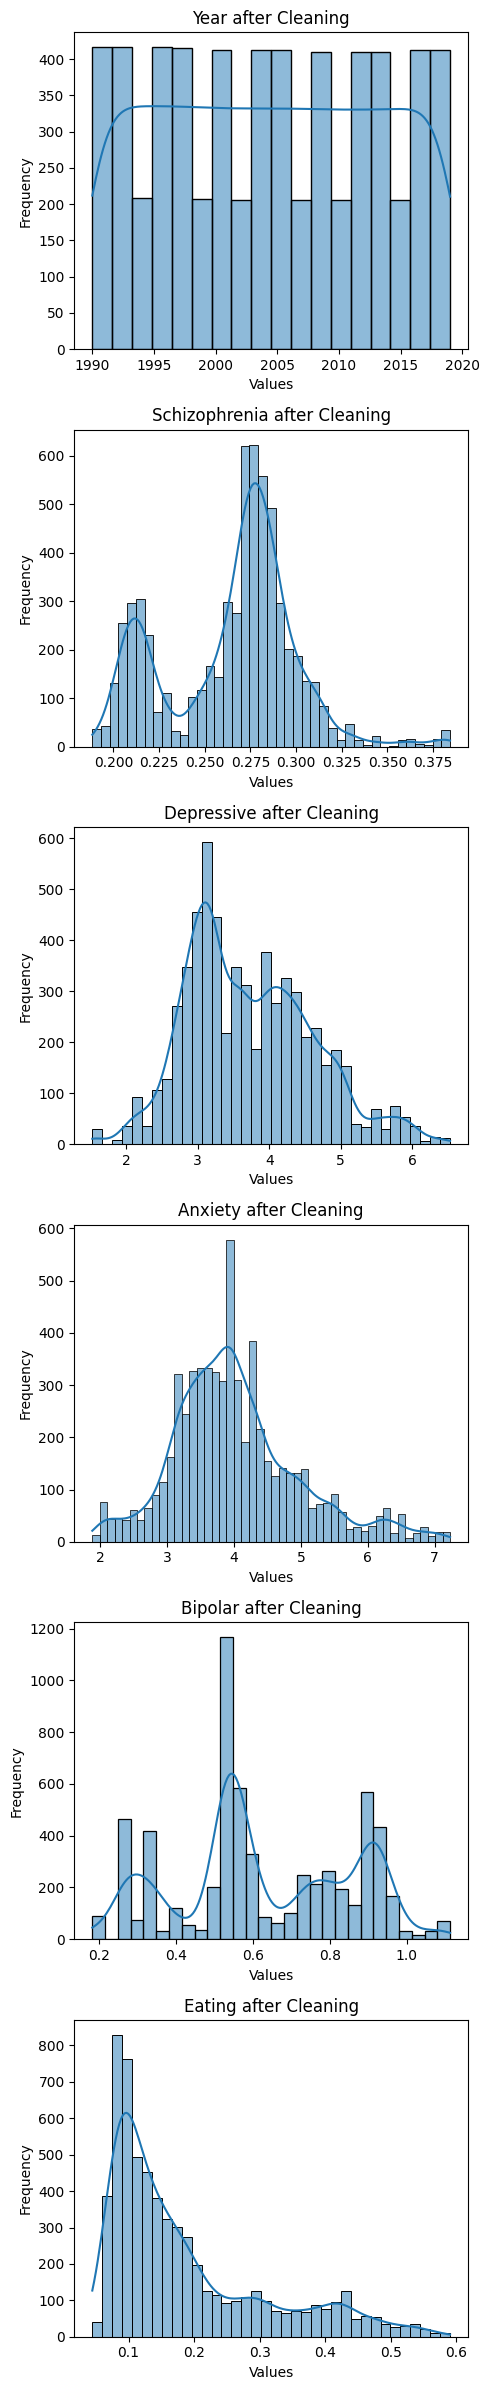

In [ ]:
# Set up the figure and axes with a larger size
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(5, 4*len(numeric_columns)))

# Histograms after cleaning
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_cleaned, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'{column} after Cleaning')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Define the file path for the cleaned data
file_path = "cleaned_data.csv"

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv(file_path, index=False)

print("Cleaned data has been saved to:", file_path)


Cleaned data has been saved to: cleaned_data.csv








AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

